In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sys
reload(sys)
sys.setdefaultencoding('utf8')
%matplotlib inline

In [2]:
voter_dataset = '/Users/Angelica/Desktop/Projects/SQL/SQL_exploration_sample_data.csv'

**Create pandas DataFrame using pd.read_csv(voter_dataset)**

In [3]:
df = pd.read_csv(voter_dataset)
df.head()

,vb_tsmart_first_name,vb_voterbase_gender,vb_tsmart_state,vb_voterbase_dob,vb_firsttimeseen_voterid,vb_voterbase_voter_score,vhsyn_vf_g2016_synthetic
0,DONALD,Male,VT,19620101,20170531,Never Voted,N
1,SHALLI,Female,OK,19601216,20160325,Infrequent Voter,E
2,RASHAD,Male,FL,19960925,20140116,Never Voted,N
3,PATRICK,Male,PA,19951003,20140114,Infrequent Voter,A
4,JESUS,Male,DE,19571201,20161129,Super Voter,Y


**Data type check to see what were working with**

In [4]:
df.dtypes

vb_tsmart_first_name        object
vb_voterbase_gender         object
vb_tsmart_state             object
vb_voterbase_dob            object
vb_firsttimeseen_voterid     int64
vb_voterbase_voter_score    object
vhsyn_vf_g2016_synthetic    object
dtype: object

**Value count reveals that we have 299 rows with no birthdays<br>Instead we have a string '(null)'**

In [5]:
df.vb_voterbase_dob.value_counts()

(null)      299
19980101    122
19960101    104
19970101     96
19950101     93
19940101     46
19930101     40
19990101     40
19910101     38
19900101     36
19860101     36
19870101     36
19890101     36
19810101     34
19820101     33
19920101     32
19840101     28
19790101     26
19750101     26
19880101     26
19830101     25
18990101     24
19760101     24
19850101     24
19770101     22
19680101     22
19740101     20
19640101     19
19620101     17
19800101     17
           ... 
19460904      1
19460907      1
19920909      1
19920906      1
19920904      1
19800425      1
19530803      1
19810127      1
19810125      1
19870520      1
19960308      1
19901211      1
19901217      1
19901215      1
19901219      1
19901218      1
19940328      1
19940329      1
19960306      1
19940322      1
19870523      1
19581001      1
19670415      1
19560131      1
19950620      1
19950624      1
19670125      1
19870527      1
19870522      1
19721214      1
Name: vb_voterbase_dob, 

**Grab all the rows that do not have '(null)' string as a birthday and store in 'new_df'<br> Reset the index as we just took out rows from the dataset**

In [6]:
new_df = df[df['vb_voterbase_dob'] != '(null)']
# index reset
new_df.reset_index(drop=True)

,vb_tsmart_first_name,vb_voterbase_gender,vb_tsmart_state,vb_voterbase_dob,vb_firsttimeseen_voterid,vb_voterbase_voter_score,vhsyn_vf_g2016_synthetic
0,DONALD,Male,VT,19620101,20170531,Never Voted,N
1,SHALLI,Female,OK,19601216,20160325,Infrequent Voter,E
2,RASHAD,Male,FL,19960925,20140116,Never Voted,N
3,PATRICK,Male,PA,19951003,20140114,Infrequent Voter,A
4,JESUS,Male,DE,19571201,20161129,Super Voter,Y
5,ALYSSA,Female,NC,19970101,20160708,Infrequent Voter,A
6,MARJORIE,Female,CA,19930823,20161130,Infrequent Voter,A
7,ANGELA,Female,MA,19570803,20140826,Never Voted,N
8,CLAIRE,Female,OK,19691001,20160325,Infrequent Voter,Y
9,JESSICA,Female,VA,19950316,20141030,Never Voted,N


**Convert dob(birthdates) into a datatime64 type**

In [7]:
new_df['vb_voterbase_dob'] = (new_df['vb_voterbase_dob'].astype(np.datetime64))

**Using the created function difference() on birthdates containing the dob column from DataFrame<br>We get back the age of each person in our dataset...but it shows as a timedelta64 value and says 'days'**

In [8]:
birthdates = new_df.vb_voterbase_dob.astype(np.datetime64)

def difference(date):
    y = np.datetime64('2019-05-05')
    date = (y - date)/365
    return date
current_minus_birthdates = difference(birthdates)
current_minus_birthdates.head()

0   57 days 09:04:26.301369
1   58 days 10:07:33.698630
2   22 days 14:55:33.698630
3   23 days 14:27:56.712328
4   61 days 11:10:41.095890
Name: vb_voterbase_dob, dtype: timedelta64[ns]

**So we convert the timedelta64 into a float value and then convert it into a integer value using astype()<br> and then save that to the 'age' variable**

In [9]:
float_days = current_minus_birthdates.astype('timedelta64[D]')

In [10]:
age = float_days.astype(int)
age.head()

0    57
1    58
2    22
3    23
4    61
Name: vb_voterbase_dob, dtype: int64

**Create a new column at index 4 with the values of age**

In [11]:
new_df.insert(loc=4, column='Age',value=age)


In [12]:
new_df.head()

,vb_tsmart_first_name,vb_voterbase_gender,vb_tsmart_state,vb_voterbase_dob,Age,vb_firsttimeseen_voterid,vb_voterbase_voter_score,vhsyn_vf_g2016_synthetic
0,DONALD,Male,VT,1962-01-01,57,20170531,Never Voted,N
1,SHALLI,Female,OK,1960-12-16,58,20160325,Infrequent Voter,E
2,RASHAD,Male,FL,1996-09-25,22,20140116,Never Voted,N
3,PATRICK,Male,PA,1995-10-03,23,20140114,Infrequent Voter,A
4,JESUS,Male,DE,1957-12-01,61,20161129,Super Voter,Y


**Quick histogram to analyze the freq of ages in our 9701 voters dataset**

Text(0.5,1,'Voter Age Freq.')

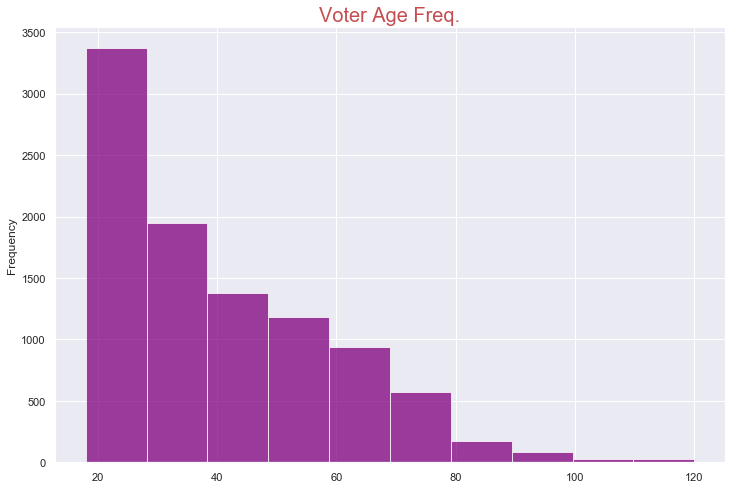

In [13]:
import seaborn as sns
sns.set()
plt.figure(figsize=(12,8))
new_df.Age.plot.hist(color='purple',alpha=.75)
plt.title('Voter Age Freq.',fontsize=20,color='r')

**We can observe the number of voters goes down as age goes up from our dataset of 9701 people**

In [15]:
new_df.dtypes

vb_tsmart_first_name                object
vb_voterbase_gender                 object
vb_tsmart_state                     object
vb_voterbase_dob            datetime64[ns]
Age                                  int64
vb_firsttimeseen_voterid             int64
vb_voterbase_voter_score            object
vhsyn_vf_g2016_synthetic            object
dtype: object

**We are going to remove the 'vhsyn_vf_g2016_synthetic', because it is unwanted in our database table that this dataset will be loaded into**

In [36]:
new_df.drop('vhsyn_vf_g2016_synthetic', axis=1, inplace=True)

In [37]:
new_df.head()

,vb_tsmart_first_name,vb_voterbase_gender,vb_tsmart_state,vb_voterbase_dob,Age,vb_firsttimeseen_voterid,vb_voterbase_voter_score
0,DONALD,Male,VT,1962-01-01,57,20170531,Never Voted
1,SHALLI,Female,OK,1960-12-16,58,20160325,Infrequent Voter
2,RASHAD,Male,FL,1996-09-25,22,20140116,Never Voted
3,PATRICK,Male,PA,1995-10-03,23,20140114,Infrequent Voter
4,JESUS,Male,DE,1957-12-01,61,20161129,Super Voter


**Rename column names to make it easier to read**

In [38]:
new_df.columns = ['First_Name', 'Gender', 'State', 'DOB', 'Age', 'Voter_Id', 'Voter_Score']

In [39]:
new_df.head()

,First_Name,Gender,State,DOB,Age,Voter_Id,Voter_Score
0,DONALD,Male,VT,1962-01-01,57,20170531,Never Voted
1,SHALLI,Female,OK,1960-12-16,58,20160325,Infrequent Voter
2,RASHAD,Male,FL,1996-09-25,22,20140116,Never Voted
3,PATRICK,Male,PA,1995-10-03,23,20140114,Infrequent Voter
4,JESUS,Male,DE,1957-12-01,61,20161129,Super Voter


**Dataset ready to be loaded into our postgres database**

In [ ]:
new_df.to_csv('voter_dataset.csv', index=False)